In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#loading my cleaned data
df = pd.read_csv('cleaned_data.csv',index_col=0)
df.head()

,GDP Growth Rate,Foreign Aid,Investment,Govt Expenditure,Trade Openness,Inflation,Shocks
Year,,,,,,,
1963,8.778340,55590000.15,20.364695,11.470881,60.995712,0.697674,0
1964,4.964467,56709999.08,13.064204,13.849177,62.601644,-0.099305,0
1965,2.009094,72129997.25,14.393945,14.842877,62.093171,3.578529,0
1966,14.728566,55409999.85,18.610241,13.729260,63.284436,5.014395,1
1967,3.361232,36709999.08,20.172649,14.129941,57.837347,1.759196,0


In [3]:
corr_matrix = df.corr()
print(corr_matrix)

                  GDP Growth Rate  Foreign Aid  Investment  Govt Expenditure  \
GDP Growth Rate          1.000000    -0.119523    0.251001          0.030409   
Foreign Aid             -0.119523     1.000000    0.057943         -0.671034   
Investment               0.251001     0.057943    1.000000          0.271347   
Govt Expenditure         0.030409    -0.671034    0.271347          1.000000   
Trade Openness           0.063883    -0.737501    0.135257          0.555951   
Inflation               -0.321844    -0.044534    0.087687          0.246699   
Shocks                  -0.201416     0.095088   -0.183310         -0.077163   

                  Trade Openness  Inflation    Shocks  
GDP Growth Rate         0.063883  -0.321844 -0.201416  
Foreign Aid            -0.737501  -0.044534  0.095088  
Investment              0.135257   0.087687 -0.183310  
Govt Expenditure        0.555951   0.246699 -0.077163  
Trade Openness          1.000000   0.337810  0.078248  
Inflation              

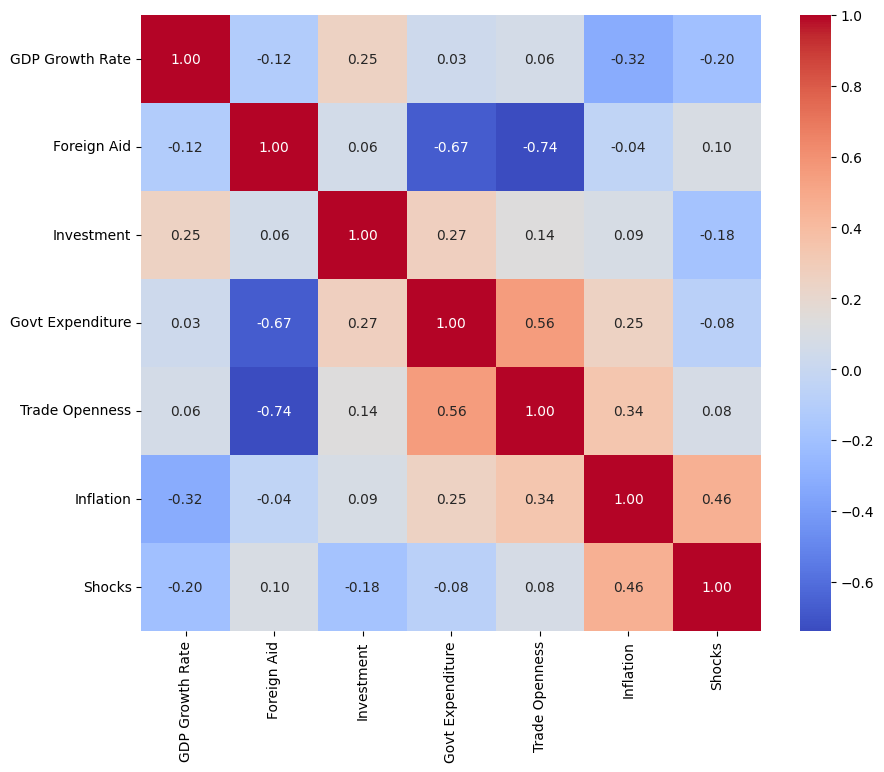

In [4]:
# visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

From our heatmap,Government expenditure is highly correlated with with foreign aid, Trade openness is also highly correlated with foreign aid, since Foreign aid is a critical variable in this case, we drop government expenditure 
and trade openness to further avoid the issue of multicollinearity.

In [5]:
df_no_gov_exp = df.drop(columns=['Govt Expenditure', 'Trade Openness'])

In [6]:
#Creating a new column for (foreign aid*shocks)
df_no_gov_exp['Foreign_Aid_Shocks'] = df_no_gov_exp['Foreign Aid'] * df_no_gov_exp['Shocks']
df_no_gov_exp.head(10)

,GDP Growth Rate,Foreign Aid,Investment,Inflation,Shocks,Foreign_Aid_Shocks
Year,,,,,,
1963,8.778340,55590000.15,20.364695,0.697674,0,0.00
1964,4.964467,56709999.08,13.064204,-0.099305,0,0.00
1965,2.009094,72129997.25,14.393945,3.578529,0,0.00
1966,14.728566,55409999.85,18.610241,5.014395,1,55409999.85
1967,3.361232,36709999.08,20.172649,1.759196,0,0.00
1968,7.982690,60709999.08,20.048829,0.366712,0,0.00
1969,7.959224,55810001.37,19.372180,-0.171501,0,0.00
1970,-4.655447,57349998.47,24.396675,2.188527,0,0.00
1971,22.173892,66849998.47,23.915987,3.780206,0,0.00


In [15]:
#Dropping the Shocks column
df1 = df_no_gov_exp.drop(columns="Shocks")
df1.head()




,GDP Growth Rate,Foreign Aid,Investment,Inflation,Foreign_Aid_Shocks
Year,,,,,
1963,8.778340,55590000.15,20.364695,0.697674,0.00
1964,4.964467,56709999.08,13.064204,-0.099305,0.00
1965,2.009094,72129997.25,14.393945,3.578529,0.00
1966,14.728566,55409999.85,18.610241,5.014395,55409999.85
1967,3.361232,36709999.08,20.172649,1.759196,0.00


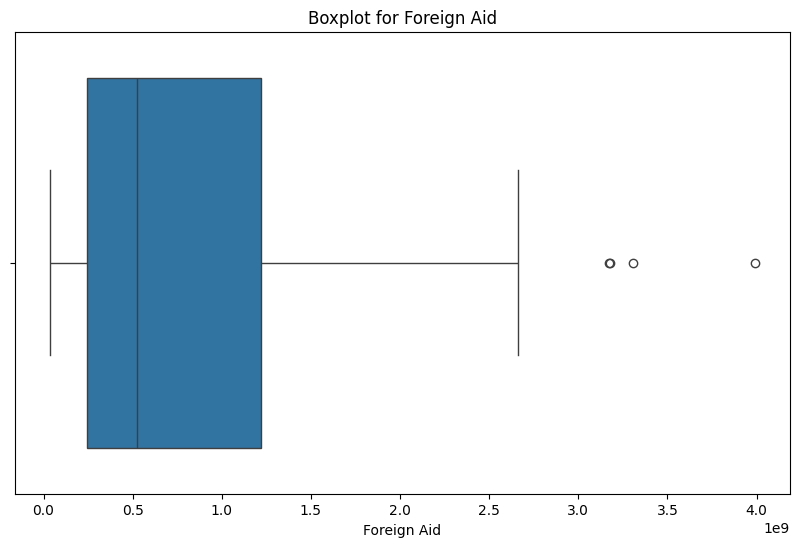

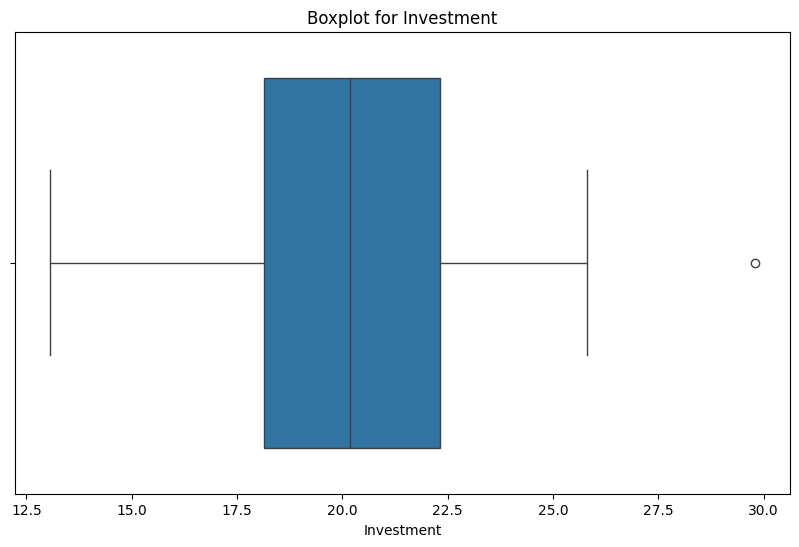

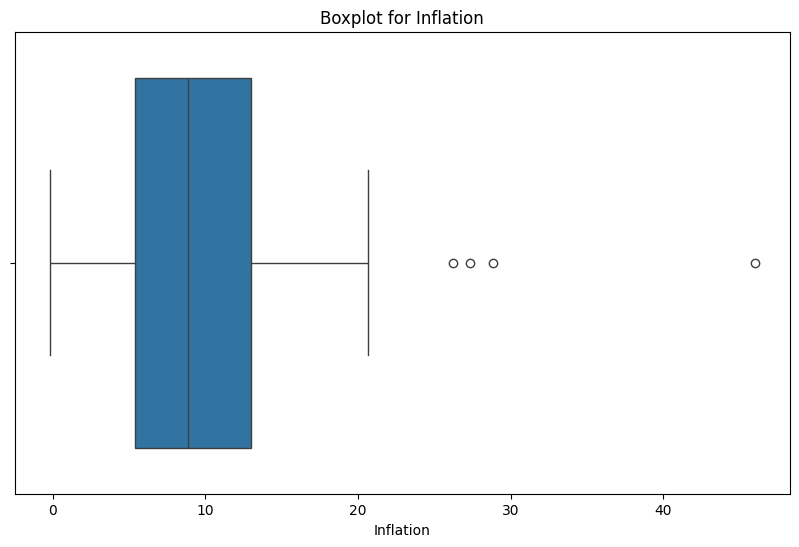

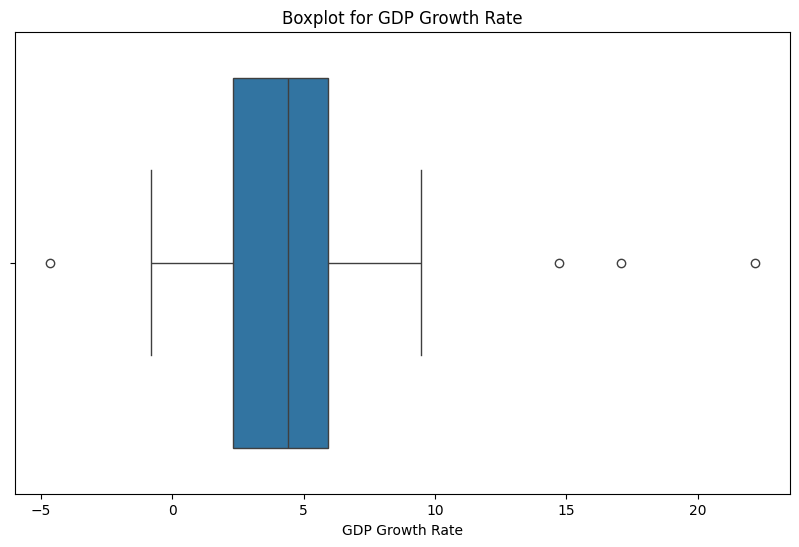

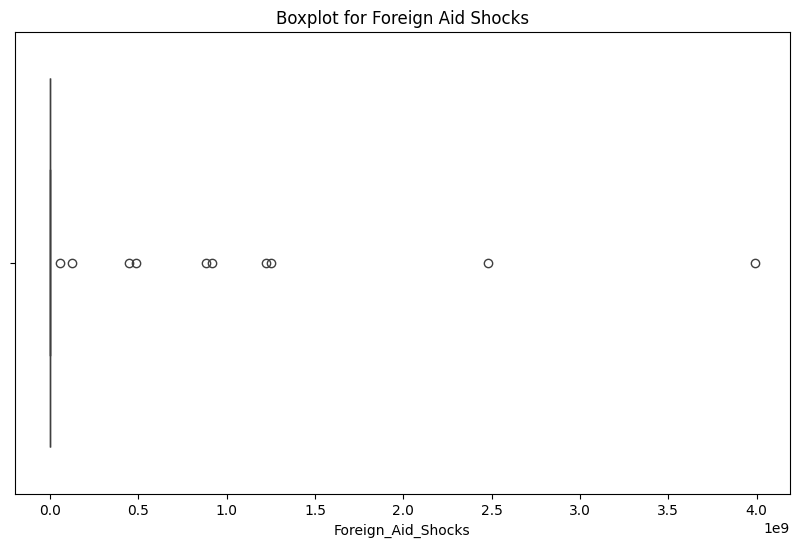

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(10, 6))

# Boxplot for Foreign Aid
sns.boxplot(x=df1['Foreign Aid'])
plt.title('Boxplot for Foreign Aid')
plt.show()

# Boxplot for Investment
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['Investment'])
plt.title('Boxplot for Investment')
plt.show()

# Boxplot for Inflation
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['Inflation'])
plt.title('Boxplot for Inflation')
plt.show()

# Boxplot for GDP Growth Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['GDP Growth Rate'])
plt.title('Boxplot for GDP Growth Rate')
plt.show()

# Boxplot for Foreign_Aid_Shocks
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['Foreign_Aid_Shocks'])
plt.title('Boxplot for Foreign Aid Shocks')
plt.show()


In [17]:
import numpy as np

# Capping outliers for all variables except GDP
variables_to_cap = ['Foreign Aid', 'Investment', 'Inflation', 'GDP Growth Rate']  # list of variables to cap
for var in variables_to_cap:
    lower_percentile = df1[var].quantile(0.05)
    upper_percentile = df1[var].quantile(0.95)
    df[var] = df[var].clip(lower=lower_percentile, upper=upper_percentile)

# Print the updated dataframe to check the changes




MULTICOLLINEARITY  
The assumption is that the independent variables should not be highly correlated.  
We use the Variance Inflation Factor (VIF) to assess multicollinearity in this case

In [19]:


# A dictionary to store my VIF values
vif_values = {}

for feature in df1.columns:
    #Defining the target and predictors variables
    X = df1.drop(columns=[feature])
    y = df1[feature]  
    
    #Adding a constant term (intercept) to the predictors for the regression model
    X_with_const = add_constant(X) 
    
    #Fit the linear regression model
    model = LinearRegression().fit(X_with_const, y)
    
    #Calculating R-squared value
    r_squared = model.score(X_with_const, y)
    
    #Calculating VIF
    vif = 1 / (1 - r_squared)
    
    #Store the VIF value in the dictionary
    vif_values[feature] = vif

#Converting the dictionary to a DataFrame
vif_values_df = pd.DataFrame(list(vif_values.items()), columns=['Feature', 'VIF'])

#Print the VIF results
print(vif_values_df)


              Feature       VIF
0     GDP Growth Rate  1.267426
1         Foreign Aid  1.245578
2          Investment  1.125938
3           Inflation  1.223046
4  Foreign_Aid_Shocks  1.294215


From the results, there is no issue of multicollinearity, all my VIFs<5

LINEARITY  
The assumption is, the relationship between the dependent and the independent variable should be linear. 

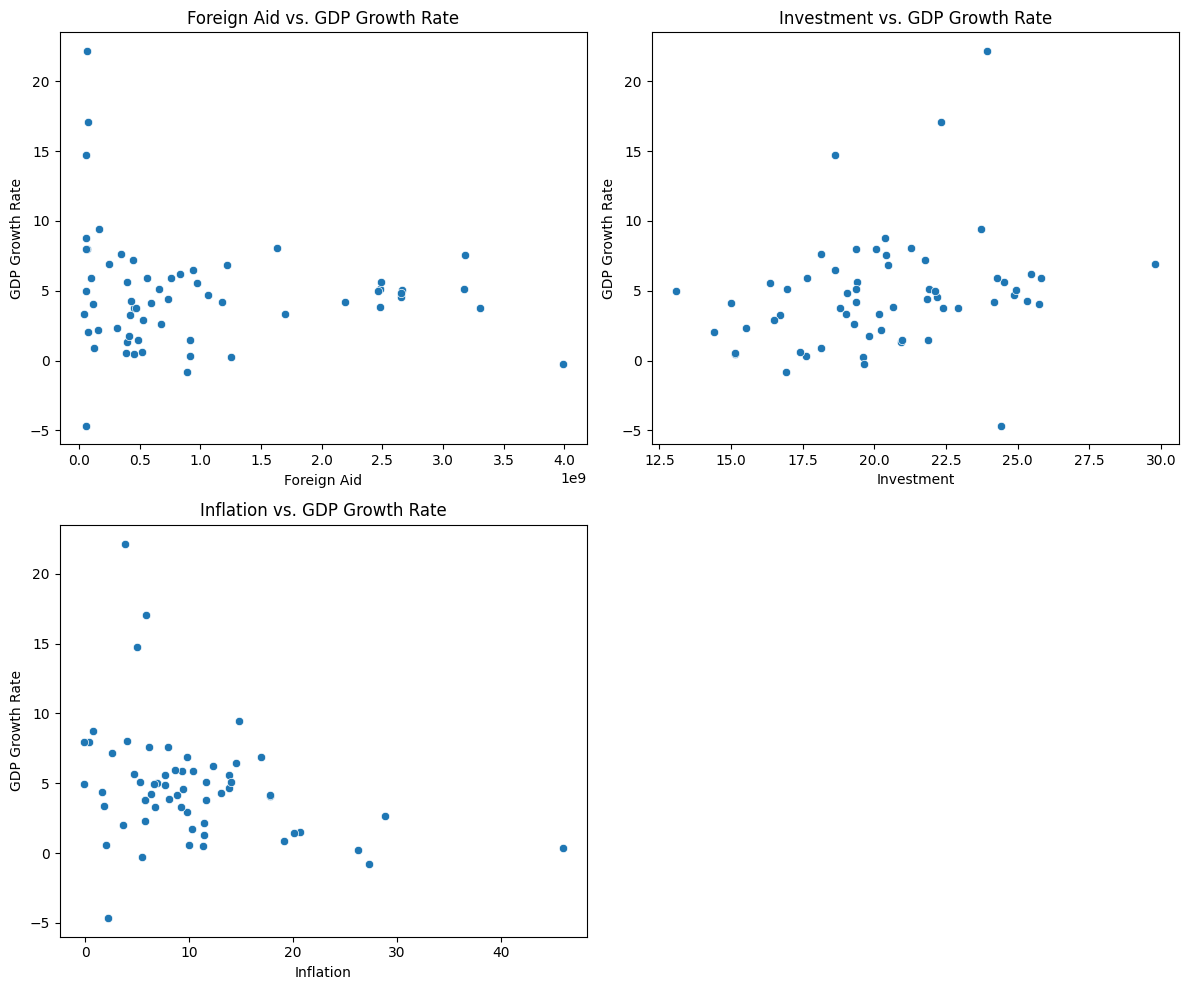

In [20]:

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x=df1['Foreign Aid'], y=df1['GDP Growth Rate'])
plt.title('Foreign Aid vs. GDP Growth Rate')

plt.subplot(2, 2, 2)
sns.scatterplot(x=df1['Investment'], y=df1['GDP Growth Rate'])
plt.title('Investment vs. GDP Growth Rate')

plt.subplot(2, 2, 3)
sns.scatterplot(x=df1['Inflation'], y=df1['GDP Growth Rate'])
plt.title('Inflation vs. GDP Growth Rate')

plt.tight_layout()
plt.show()

In [21]:

# Prepare the independent variables and dependent variable
X = df1[['Foreign Aid', 'Investment', 'Inflation', 'Foreign_Aid_Shocks']]
y = df1['GDP Growth Rate']
X = sm.add_constant(X)  # Adds constant (intercept) to the model

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Perform the Ramsey RESET test
reset_test = sms.het_breuschpagan(model.resid, model.model.exog)

# Test Statistic and P-Value
test_statistic, p_value = reset_test[0], reset_test[1]

print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")




Test Statistic: 9.589261636749882
P-value: 0.04794508188244969


From the results, the relationship between the independent variables and the dependent variable   
is not well captured by the linear regression model, The P-value is less than 0.05(5% significance level).

Checking for outliers

In [22]:
#log transformation to take care of the large values
df1['Foreign Aid'] = np.log(df1['Foreign Aid'] + 1)  # Adding 1 to avoid log(0)
df1['Foreign_Aid_Shocks'] = np.log(df1['Foreign_Aid_Shocks'] + 1)


The next step is to define our independent variables and dependent variable

In [25]:

# independent variables and dependent variable
X = df1.drop(columns="GDP Growth Rate")
y = df1['GDP Growth Rate']  

# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#print(X.head())
#print(y.head())


Normality Test

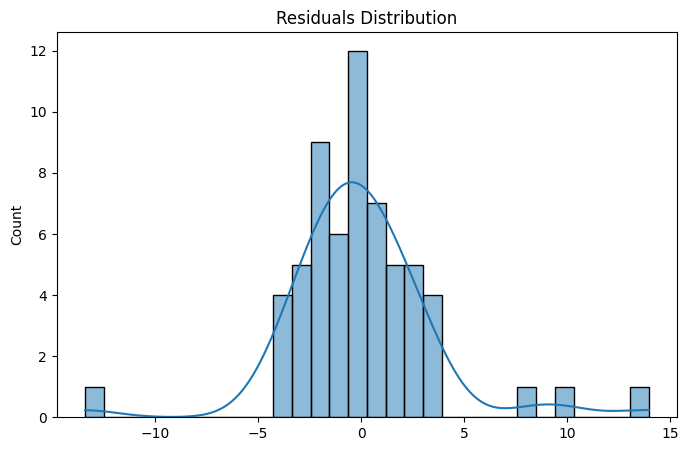

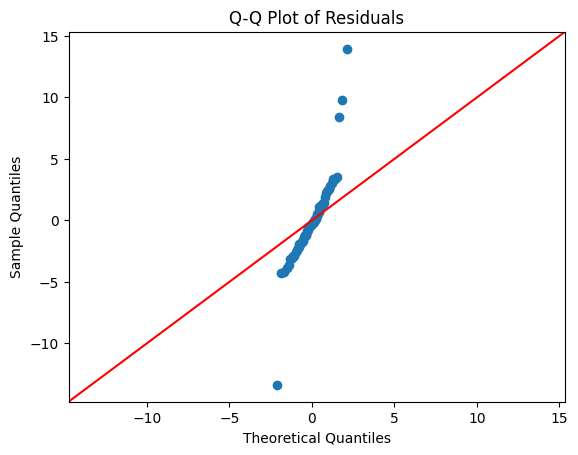

In [28]:
import scipy.stats as stats

# Histogram of residuals
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()


HETEROSCEDASTICITY

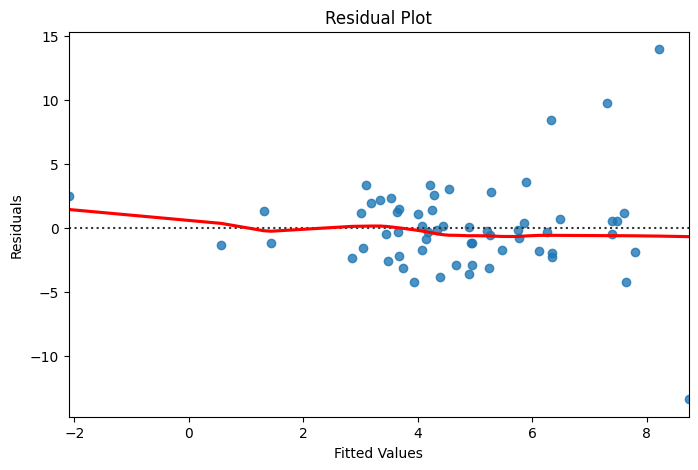

In [27]:
import statsmodels.api as sm

# Fit the OLS model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Get residuals
residuals = model.resid

# Residual plot
plt.figure(figsize=(8, 5))
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [29]:

# Step 1: Run OLS to estimate residuals
ols_model = sm.OLS(y, X).fit()
residuals = ols_model.resid

# Step 2: Compute error variance (weights for GLS)
error_variance = np.log(residuals**2)  # Log transformation to stabilize variance
error_variance = np.exp(error_variance - np.mean(error_variance))  # Normalize

# Step 3: Run GLS Regression
gls_model = sm.GLS(y, X, sigma=error_variance).fit()

# Print GLS Summary
print(gls_model.summary())

                            GLS Regression Results                            
Dep. Variable:        GDP Growth Rate   R-squared:                       0.833
Model:                            GLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     69.85
Date:                Thu, 10 Apr 2025   Prob (F-statistic):           4.17e-21
Time:                        15:32:03   Log-Likelihood:                -101.81
No. Observations:                  61   AIC:                             213.6
Df Residuals:                      56   BIC:                             224.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.3761      0